In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Validation

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.shape

(545, 13)

In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Exploratory Data Analysis

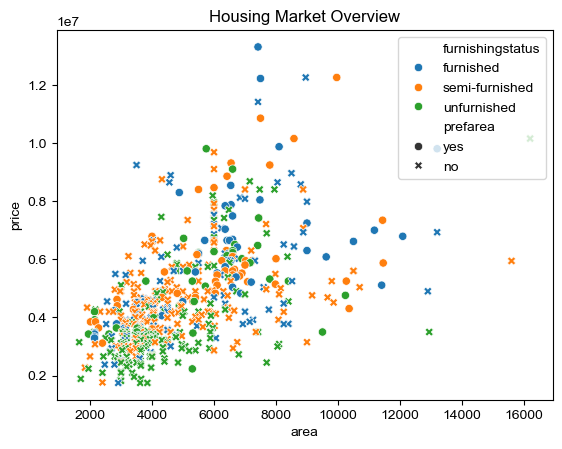

In [8]:
ax=sns.scatterplot(data = df, x = "area" ,y="price",hue="furnishingstatus",style="prefarea")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax.set_title("Housing Market Overview")
plt.show()

We have a rather complex graph. This graph will provide a direct insight into our dataset because it contains many values. There's a positive relationship between price and area, but it's not linear. The reason for the non-linearity is that it contains many parameters. Let's simply examine the other parameters:

- Preferred areas appear more expensive. This could lead us to a simple assumption that preferred areas are more central.

- Furnished homes are higher price to other homes throughout the graph, and the price difference is quite clear.

- Looking to the right of the graph, we can see a few outliers. The fact that these are mostly undesirable areas suggests they could be residential areas outside the city. These could be land plots or villas.

### Univariate Analysis

<Axes: xlabel='area', ylabel='Count'>

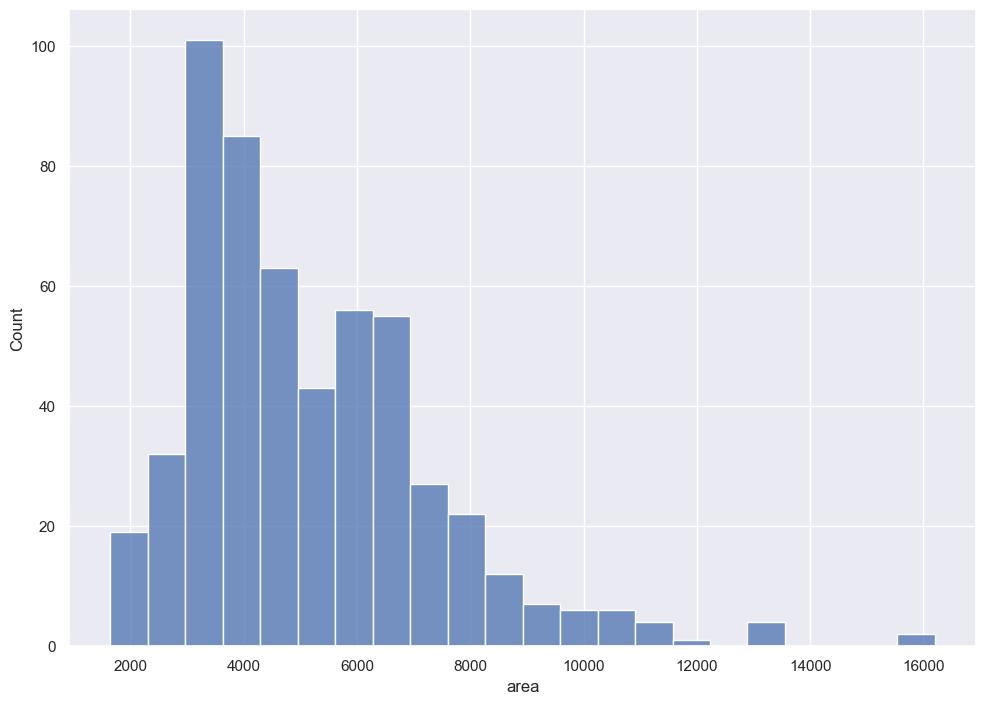

In [9]:
sns.histplot(data=df,x="area")

<Axes: xlabel='price', ylabel='Count'>

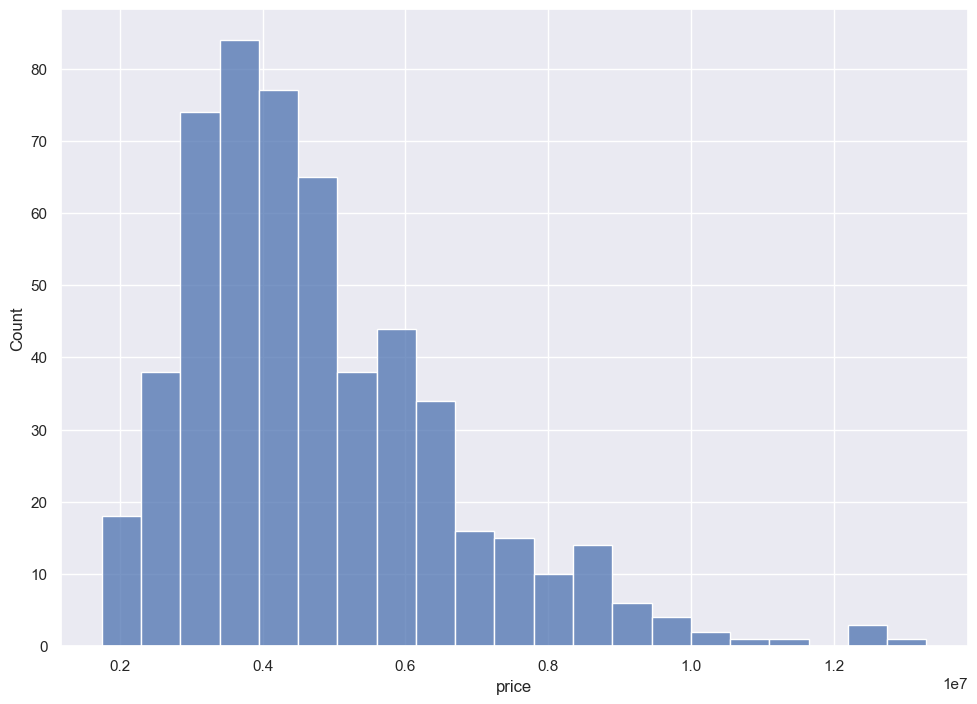

In [10]:
sns.histplot(data=df,x="price")

When we independently monitor the area and price of homes, we obtain right-skewed graphs. This generally indicates that the homes in our data set are more middle- to lower-income.

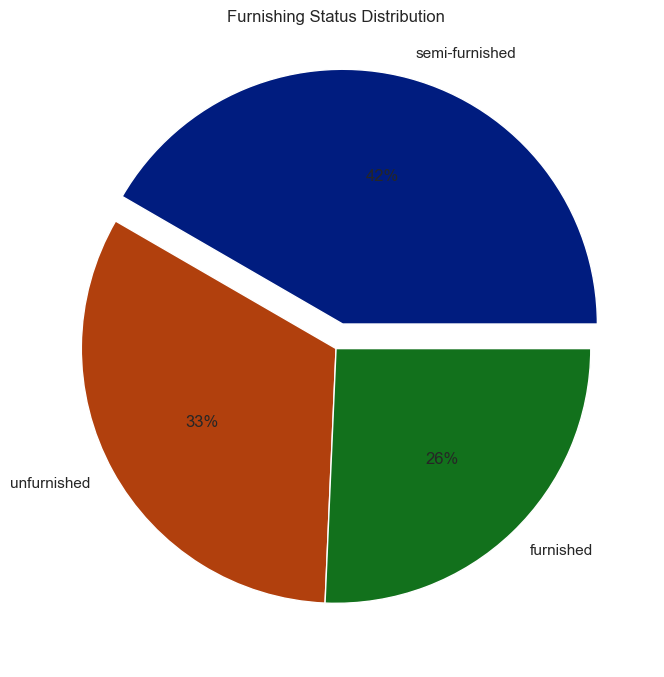

In [11]:
counts = df['furnishingstatus'].value_counts()
plt.pie(
    counts,  
    labels=counts.index,  
    colors=sns.color_palette('dark'),
    explode=[0.1, 0, 0],  
    autopct='%.0f%%'
)

plt.title("Furnishing Status Distribution")
plt.show()

When we check the furnishing status of the houses, semi-furnished houses are in the first place with a rate of 42%. The houses with the least amount are furnished with 26%. The houses without furnishings have an intermediate value with 33%.

### Bivariate Analysis

C:\Users\Faruk\AppData\Local\Temp\ipykernel_23056\510661776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(data=df,x="prefarea",y="price",kind="violin",palette=["blue","red"])


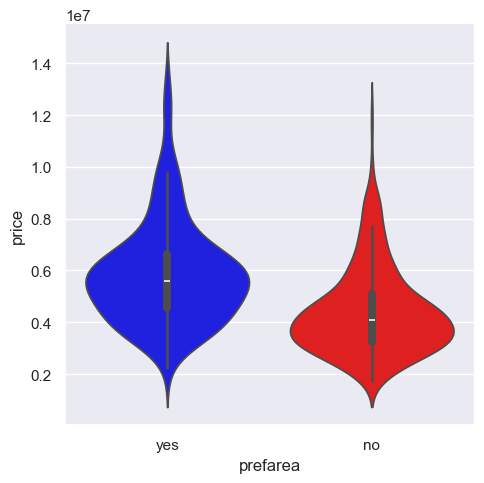

In [12]:
ax = sns.catplot(data=df,x="prefarea",y="price",kind="violin",palette=["blue","red"])

Homes in desirable areas generally have higher prices than those in undesirable areas, and the price distribution is spread out over a wider range.

C:\Users\Faruk\AppData\Local\Temp\ipykernel_23056\1134312221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df,x="total_rooms",y="price",palette='viridis')


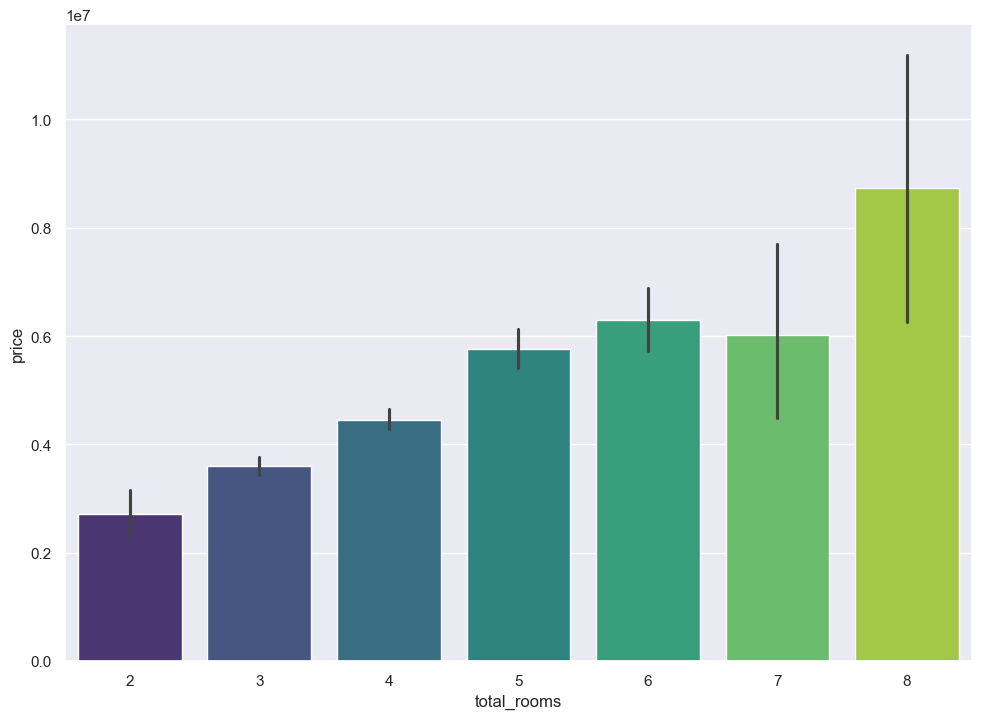

In [13]:
df["total_rooms"] = df["bathrooms"] + df["bedrooms"]

ax = sns.barplot(data=df,x="total_rooms",y="price",palette='viridis')

The total number of rooms in houses has a positive effect on price.

### Multivariate Analysis

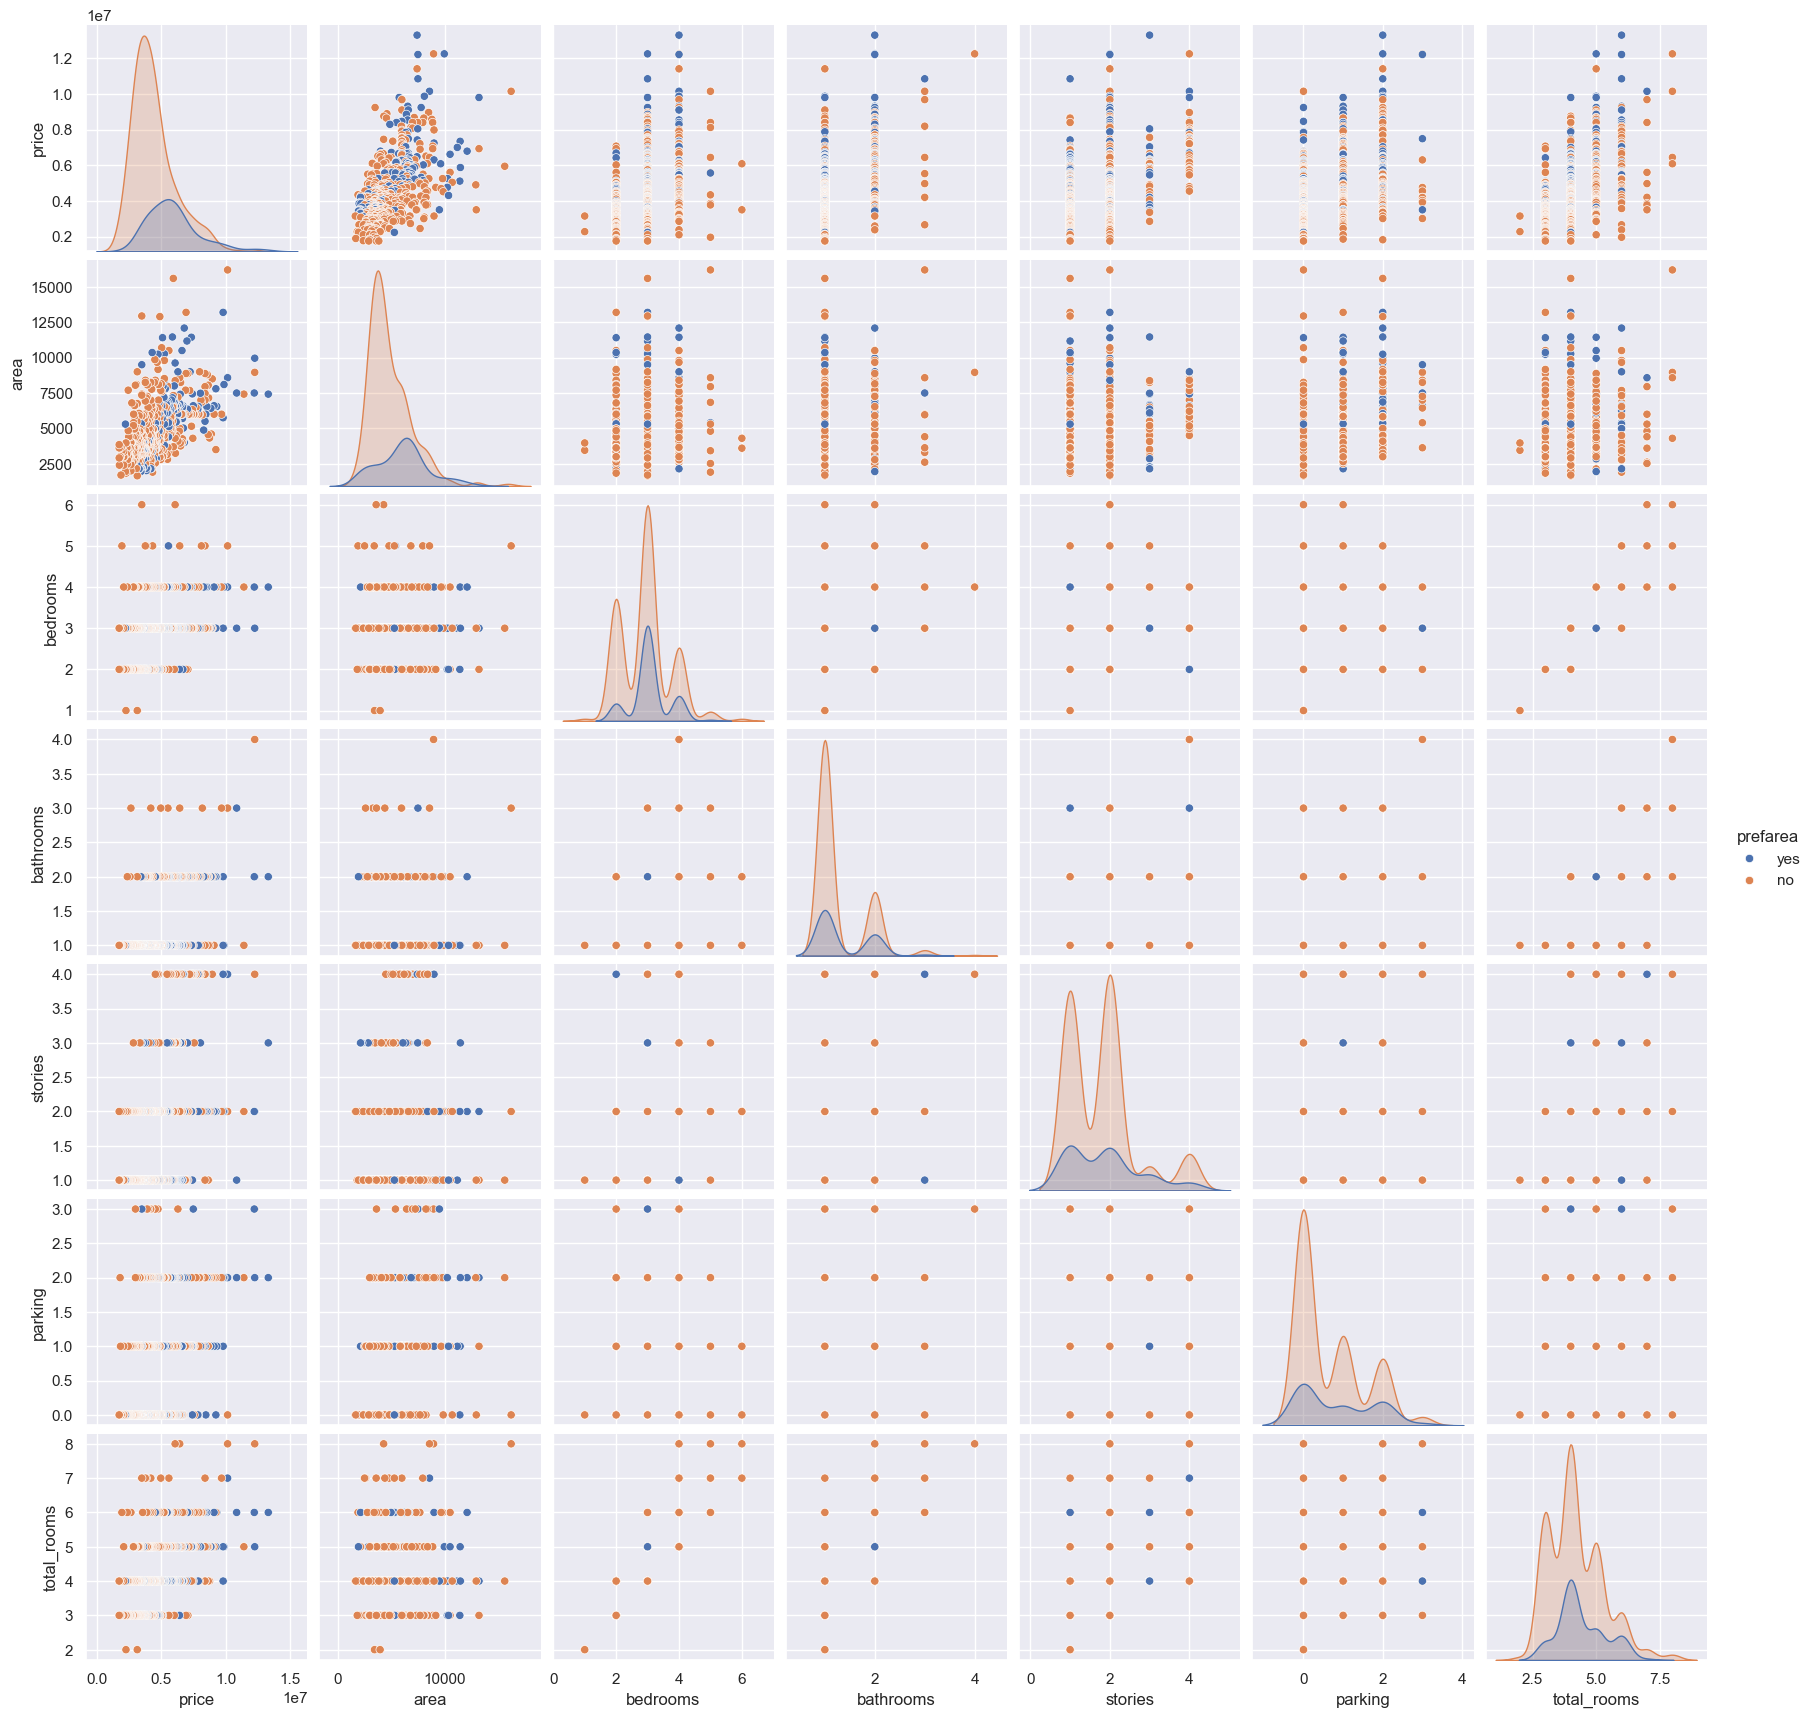

In [14]:
sns.pairplot(df, hue ='prefarea')
plt.show()

An overview of all the data in the data set.

# Model Setup

In [15]:
#label encoder for one value columns
le = LabelEncoder()

col_to_change=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for column in df[col_to_change]:
    df[column] = le.fit_transform(df[column])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,4
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,4


In [16]:
#One Hot Encoding for Furnishing Status
df = pd.get_dummies(df,columns=["furnishingstatus"],dtype=int)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,total_rooms,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,6,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,8,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,5,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,6,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,4,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,4,1,0,0


In [17]:
#Feature Scaling for Area

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop('price')  # target hariç
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])


In [18]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Linear Regression Setup
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [24]:
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) 
rmse = math.sqrt(rmse)
print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R²: 0.6529242642153177
MAE: 970043.4039201642
RMSE: 1324506.96009144


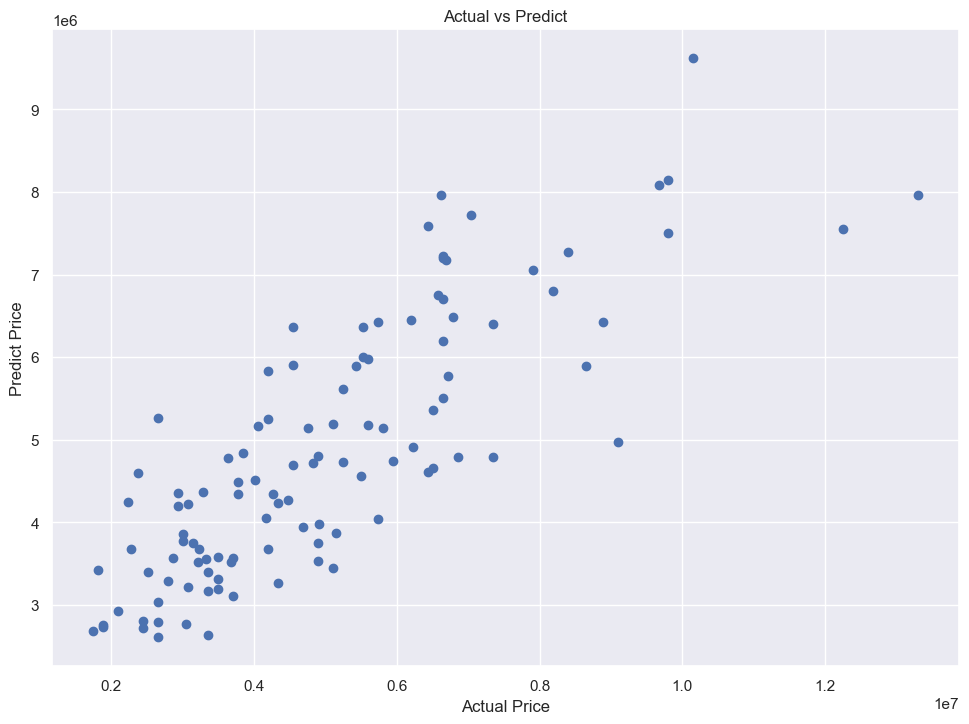

In [22]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
plt.title("Actual vs Predict")
plt.show()